<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-1"><strong>Исследование данных</strong></a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1">Знакомство с данными</a></span></li><li><span><a href="#Пропущенные-значения-и-типы-данных" data-toc-modified-id="Пропущенные-значения-и-типы-данных-1.2">Пропущенные значения и типы данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><strong>Анализ данных</strong></a></span><ul class="toc-item"><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2.1">Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-2.2">Графики</a></span></li></ul></li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-3"><strong>Проверка гипотезы</strong></a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><strong>Выводы</strong></a></span></li></ul></div>

# **Исследование данных**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

## Знакомство с данными

In [3]:
flights_model = pd.read_csv('../datasets/query_1.csv')
flights_city = pd.read_csv('../datasets/query_3.csv')
week_ticket = pd.read_csv('../datasets/query_last.csv')

In [4]:
flights_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
flights_city.sample(5)

,city,average_flights
17,Геленджик,2.590909
24,Йошкар-Ола,4.290323
91,Хабаровск,6.548387
79,Тамбов,4.000000
55,Новый Уренгой,8.290323


In [6]:
week_ticket

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


<a id="duplicates"></a>
## Пропущенные значения и типы данных

In [7]:
flights_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [8]:
flights_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
week_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Пропущенные занчения есть только в таблице с наличием фестивалей в каждую неделю с 23 июля по 30 сентября 2018 года: если фестиваля не было, значений в столбцах недели проведения фестиваля и названия фестиваля стоят пропуски.

Все типы данных в порядке, кроме номера недели проведения фестиваля. Его надо преобразовать в целое число. Для этого сначала надо избавиться от пропусков. Заполним пропуски значением `-1`, поскольку такого номера недели не существует.

In [10]:
week_ticket['festival_week'] = week_ticket['festival_week'].fillna(-1)
week_ticket['festival_week'] = week_ticket['festival_week'].astype(int)

<a id="analysis"></a>
# **Анализ данных**

<a id="top-10_cities"></a>
## Топ-10 городов по количеству рейсов

In [11]:
top_flights_city = flights_city.sort_values('average_flights', ascending = False).head(10)
top_flights_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Сильно отличается количество рейсов, пребывающих в Москву. Скорее всего из-за того, что здесь целых 3 аэропорта, которые просто технически могут принять большее количество самолётов. Также Москва является крупным мегаполисом, куда помимо пассажирских рейсов пребывает большое количество самолётов для грузоперевозок. Возможно, из-за того, что Москва является столицей, присутствуют ещё перелёты для военных целей.  
Хотя лучше было бы знать, откуда эти данные были взяты: возможно, это информация с сайта для "гражданских", тогда в этих цифрах учитываются только пассажирские самолёты, что тоже объясняет разницу между Москвой и остальными городами (размер и население города сильно больше, чем у остальных), или же эти данные взяты напрямую от самих авиакомпаний по всем рейсам, совершаемым ими, тогда предположение о грузоперевозках и других технических рейсах остаётся актуальным.

<a id="graphics"></a>
## Графики

In [12]:
def plot_amount(data, text, save, figsize, labelsize):
    data_names = data.iloc[:, 0]
    data_values = data.iloc[:, 1]
    xs = range(len(data_names))
    
    fig = plt.figure(figsize = figsize)
    ax = plt.grid(True, zorder = 1)
    plt.barh([x for x in xs], [d for d in data_values],
             height = 0.5, color = '#33BBFF', zorder = 2)
    
    plt.tick_params(axis = 'y', labelsize = labelsize)
    plt.yticks(xs, data_names)
    plt.title(text)
    
    plt.savefig('../images/'+save+'.png', bbox_inches='tight')
    return plt.show()

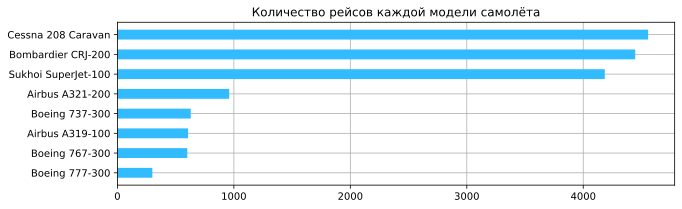

In [13]:
plot_amount(flights_model.sort_values('flights_amount'),
            'Количество рейсов каждой модели самолёта',
            'flights_model', (10, 3), 10)

Наиболее отличающиеся от остальных по количеству рейсов модели Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 являются ближнемагистральными самолётами общего назначения с дальностью полёта 1800 - 4600 км, которые используются не только для перевозки пассажиров, но и для грузоперевозки и военных целей.  
В то время как остальные модели только пассажирские и предназначены для полётов средней и дальней протяжённости.

То есть такая разница количества рейсов между моделями самолётов вызвана разностью их назначения и дальностью полёта: ближнемагистральные самолёты меньше времени находятся в пути, то есть могут вылететь, вернуться и снова вылететь несколько раз, пока среднемагистральный самолёт находится в рейсе, а также самолёты общего назначения используются для большего количества целей, что так же увеличивает их количество рейсов.

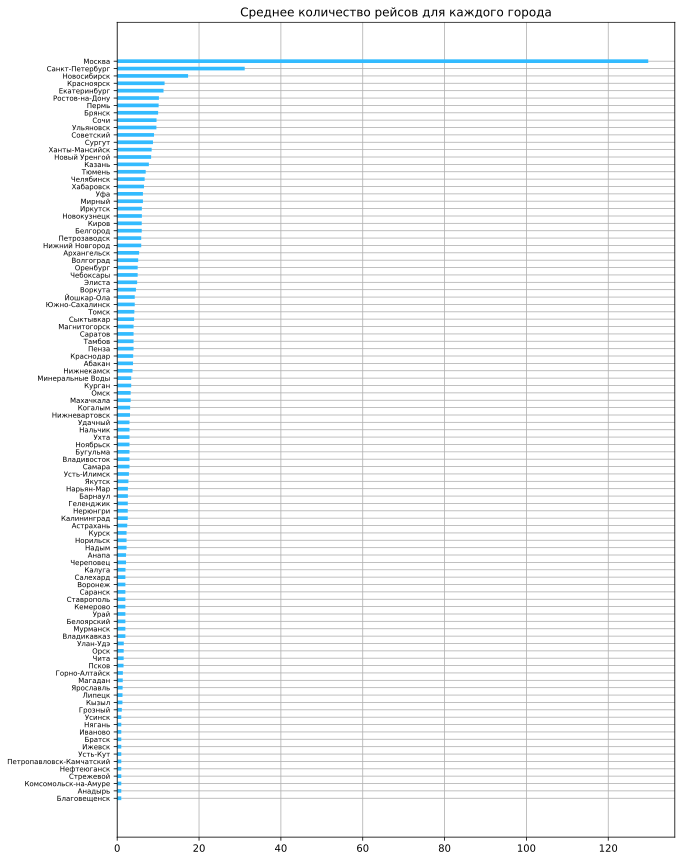

In [14]:
plot_amount(flights_city.sort_values('average_flights'),
            'Среднее количество рейсов для каждого города',
            'flights_city', (10, 15), 7)

Предполагаю, что низкая посещаемость городов обусловлена их населением и инфраструктурой.  
То есть, малое количество людей, населяющих город, дают малое количество рейсов к ним в гости или их самих.  
А также в небольших городах и их окресностях редко проводятся мероприятия, собирающие людей со всего мира/страны.

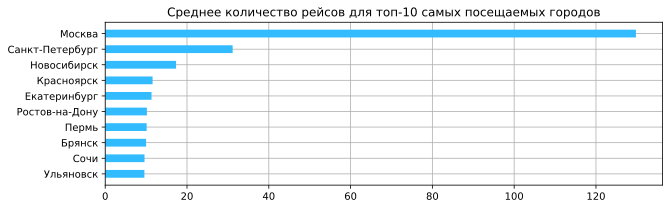

In [15]:
plot = plot_amount(top_flights_city.sort_values('average_flights'),
                   'Среднее количество рейсов для топ-10 самых посещаемых городов',
                   'top_flights_city', (10, 3), 10)

В отличие от остальных городов, в Москве имеется целых 3 аэропорта для пассажирских перевозок, что увеличивает само количество самолётов, которое Москва может принять.  
Население этих городов > 400000 человек и в этих городах, возможно, чаще, чем в остальных устраивают фестивали, концерты и выставки, на которые люди стремятся попасть в больших количествах.

<a id="hypothesis"></a>
# **Проверка гипотезы**

H$_0$ = «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»

Сравниваются независимые выборки (данные о неделях без фестивалей и с фестивалями).

In [16]:
week_ticket

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,-1,NaN
3,33,51378,-1,NaN
4,34,51492,-1,NaN
5,35,51360,-1,NaN
6,36,51386,36,Видфест
7,37,51670,-1,NaN
8,38,51518,-1,NaN
9,39,51623,-1,NaN


In [17]:
results = st.ttest_ind(
    week_ticket.query('festival_week == -1')['ticket_amount'], 
    week_ticket.query('festival_week != -1')['ticket_amount'])

print('p-значение:', results.pvalue)
print('вероятность: {:.2%}'.format(results.pvalue))

alpha = 0.05

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
вероятность: 9.69%
Не получилось отвергнуть нулевую гипотезу


И по таблице видно, что количество купленных билетов во время проведения фестивалей не особо отличается от недель без фестивалей.

In [18]:
print ('Среднее количество билетов в неделю, когда не проходит фестивалей: {:.2f}'.format(
    week_ticket.query('festival_week == -1')['ticket_amount'].mean()))
print ('Среднее количество билетов в неделю, когда проходит фестиваль: {:.2f}'.format(
    week_ticket.query('festival_week != -1')['ticket_amount'].mean()))

Среднее количество билетов в неделю, когда не проходит фестивалей: 51530.86
Среднее количество билетов в неделю, когда проходит фестиваль: 48662.67


<a id="summary"></a>
# **Выводы**

Из-за предварительного формирования запросов особых проблем в данных не было.  
Столбец с номерами недель, когда проводились фестивали был преобразован в целочисленный тип, а пропуски заполнены значением, которое невозможно спутать с возможным значением (-1).

**Топ-10 городов по количеству рейсов:**

город|	количество рейсов
-|-
Москва	|129.774194
Санкт-Петербург|	31.161290
Новосибирск|	17.322581
Красноярск	|11.580645
Екатеринбург	|11.322581
Ростов-на-Дону|	10.193548
Пермь	|10.129032
Брянск|	10.000000
Сочи	|9.612903
Ульяновск	|9.580645

**В ходе анализа построены следующие графики:**
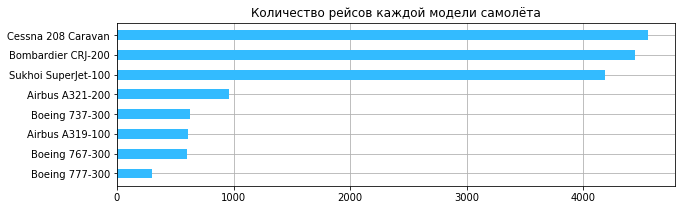  
Предположительно такая разница количества рейсов между моделями самолётов вызвана разностью их назначения и дальностью полёта: ближнемагистральные самолёты меньше времени находятся в пути, то есть могут вылететь, вернуться и снова вылететь несколько раз, пока среднемагистральный самолёт находится в рейсе, а также самолёты общего назначения используются для большего количества целей, что так же увеличивает их количество рейсов.
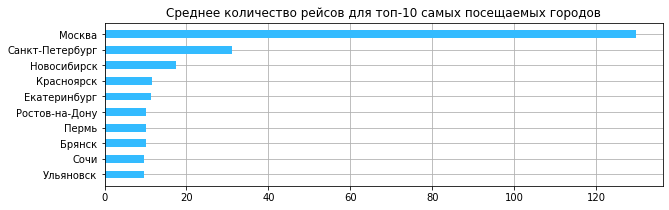
Предположительно такая разница прилётов для Москвы и остальных городов связана с тем, что в Москве находится целых 3 аэропорта, а также здесь гораздо больше поводов посетить этот город. Так как он больше по площади, здесь чаще устраиваются фестивали, выставки и концерты, на которые люди приезжают со всей страны.

**Была выдвинута гипотеза** о том, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время, опровергнуть которую не удалось.  
Среднее количество билетов в неделю, когда не проходит фестивалей: 51530.86  
Среднее количество билетов в неделю, когда проходит фестиваль: 48662.67